<img src="http://noticias.universia.net.co/co/images/docentes/k/ko/kon/konrad.jpg">
# Simulation
### Final Exam
<b>Name:</b> Viviana Márquez<br>
<b>Code:</b> 614132005<br>
<b>Date:</b> Saturday, May 27, 2017<br>
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

<hr>
### 1.  On the Multiplicative Linear Congruential Methods

In [3]:
lista=[137, 1234, 535, 1377, 1856, 1533, 814, 639, 32, 1260]

alfas = list()
for l in range(0,len(lista)-1):
    alfas.append([lista[l],lista[l+1]])

vecs = list()
for i in range(0,len(alfas)-2):
        vecs.append(round(np.abs(np.linalg.det([[alfas[i+1][0]-alfas[i][0],alfas[i+1][1]-alfas[i][1]],[alfas[i+2][0]-alfas[i+1][0],alfas[i+2][1]-alfas[i+1][1]]]))))
    
from fractions import gcd
b = vecs[0]
gcds = list()

for v in range(0,len(vecs)-1):
    b = gcd(b,vecs[v+1])
    gcds.append(b)

#m
from collections import Counter
count = Counter(gcds)
m = count.most_common()[0][0]

#a
i = 0
while (True):
    i= i+1
    n = (((alfas[0][0]-alfas[0][1])*i)-(alfas[1][0]-alfas[1][1]))/m
    h = n - int(n)
    if h==0:
        #print ("a = %a"%i)
        break 
A=i

#c
j = 0
while (True):
    j= j+1
    l = ((alfas[0][0]*A)-alfas[0][1]+j)/m
    f = l - int(l)
    if f==0:
        #print ("c = %a"%j)
        break    
C=j

print ("m = %a"%int(m))
print ("a = %a"%A)
print ("c = %a"%C)

m = 1951
a = 1319
c = 23


/Users/vivianamarquez/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:16: DeprecationWarning: fractions.gcd() is deprecated. Use math.gcd() instead.


<hr>
### 2. On the Theoretical aspects of the Metropolis-Hastings Algorithm.
Use Metropolis to sample from the $pdf$
<center>$f(x)=cx^2e^{-x}$</center><br>
for $0 \leq x \leq \infty$. As the neighborhood of $x$, take the interval $[x-\delta,x+\delta]$ for some $\delta>0$. Check the $pdf$ and the effect of start point (by doing a $pdf$ starting from different points). Comment on your results.

(array([   0.,    0.,    0.,    0.,    0.,   82.,  208.,  217.,  216.,
         172.,   73.,   18.,   13.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.]),
 array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13, 14, 15, 16, 17, 18, 19]),
 <a list of 24 Patch objects>)

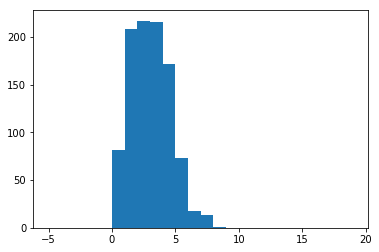

In [6]:
def f(x):
    return 0.5*x**2 *np.exp(-x) #Let c=1/2

n=1000 #A thousand experiments
d=np.zeros(n)
x=2

for i in range(n):
    y=np.random.uniform(x-1,x+1,1)[0] #Let d=1
    if y<0:
        y=x
    h=min(1,f(y)/f(x))
    #print (h)
    U=np.random.rand()
    if U < h:
        x=y
    d[i]=x
    
a=np.arange(-5,20)
plt.hist(d,a)

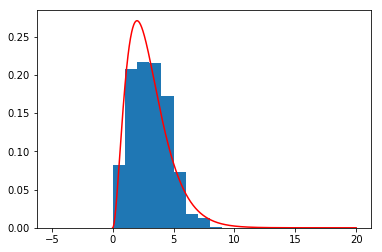

In [7]:
a=np.arange(-5,20)
x=np.linspace(0,20,1000)
plt.hist(d,a,normed=1)
plt.plot(x,f(x),"r")

In this distribution, we rejected all negative values. As we take different values of $x$ for a starting point, it starts to deviate from the fuction, giving a new range of possibilites over rejection.

<hr>
### 3. A Markov Chain Monte Carlo Implementation.
<center>$I = {\displaystyle\frac{1}{2}\int_{0}^{1}\int_{0}^{1} (e^{-x^2}\sin(y^2))dxdy}$</center>

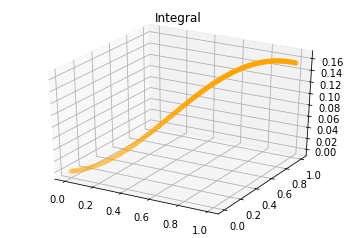

In [4]:
def fun(x,y): #Let us define the function for the integral
    return (1/2)*np.exp(-x**2)*np.sin(y**2)

#Now let us graph this thing.
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
plt.title("Integral")
ax.scatter(x,y,fun(x,y),c="orange")

In [5]:
#Let us count how many random numbers fall under the region.
def vol(n):
    x = np.random.uniform(0,1,n)
    y = np.random.uniform(0,1,n)
    z = np.random.uniform(0,1,n)
    hits = sum(z<fun(x,y))
    return hits/n

#Let us find the answer now.
print ("The integral is approximately:")
print("{0:.6f}".format(vol(100000)))

The integral is approximately:
0.116010
